# Emergency 911 calls Feature Engineering and Exploratory Data Analysis Project

### Importing analysis and visualization packages

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import style
style.use('seaborn-whitegrid')


In [97]:
df = pd.read_csv('911.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [99]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [100]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Topic five zipcodes for 911 calls.

In [101]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships that call 911.

In [102]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Number of Unique title codes.

In [103]:
df['title'].nunique()

110

In [104]:
# Creating reasons fields
df['Reasons'] = df['title'].apply(lambda x:x.split(':')[0])

Top reasons for emergency calls.

In [105]:
df['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

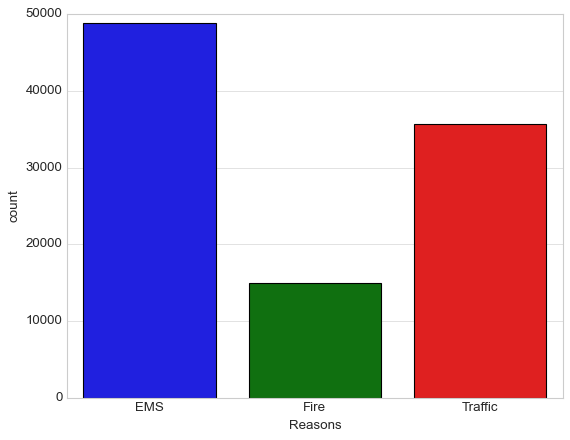

In [106]:
sns.countplot(x = df['Reasons'], data = df)

Converting timeStamp datatype from string to datatime.

In [107]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [108]:
df.timeStamp[0].hour

17

Creating new cloumns for hour, day of the week, Month from timeStamp column. 

In [109]:
df['Hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['day of week'] = df['timeStamp'].apply(lambda x:x.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda x:x.month)

In [110]:
# Creating map using .map() method to get names of each day of the week.
dmap = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}

In [111]:
df['day of week'] = df['day of week'].map(dmap)

Which day of the week receives  most number of calls based on reasons?

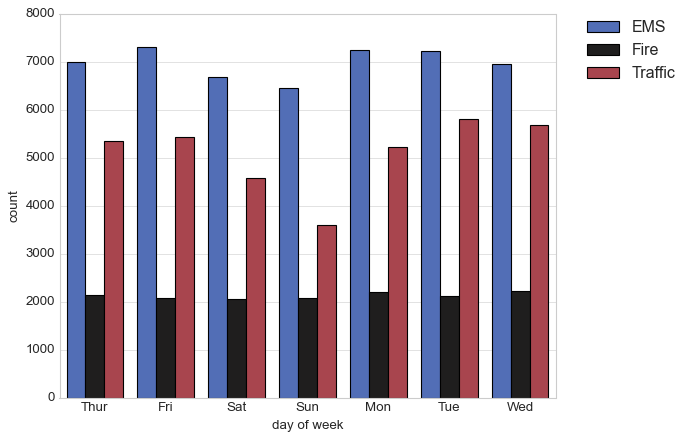

In [112]:
sns.countplot(x = 'day of week', data = df, hue = 'Reasons',palette="icefire")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Which month of the year receives most number of calls based on reasons?

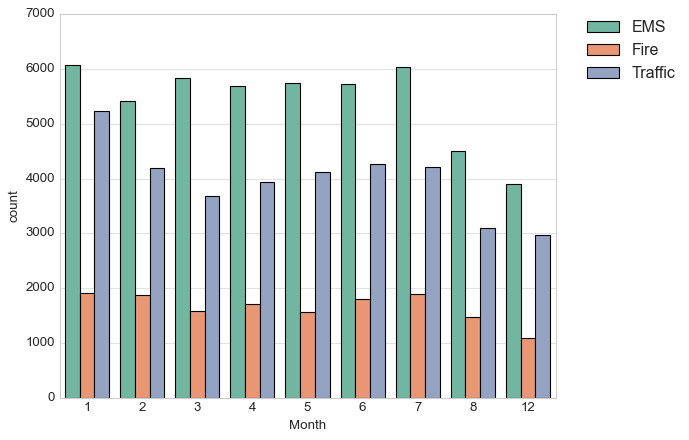

In [113]:
sns.countplot(x = 'Month', data = df, hue = 'Reasons', palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)